#Use Uniform Cost Search (UCS)for solving the Missionaries and Cannibals problem
By Ivan Dsilva - 9193

The optimal path is ['start', 'A', 'C', 'F', 'goal'] with a cost of 7


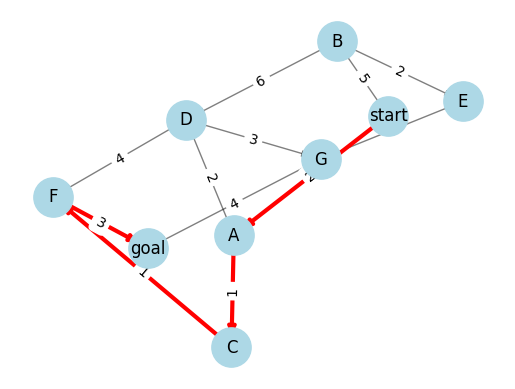

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the problem as a graph with nodes, edges and costs
graph = {
    "start": {"A": 2, "B": 5},
    "A": {"C": 1, "D": 2},
    "B": {"D": 6, "E": 2},
    "C": {"F": 1},
    "D": {"F": 4, "G": 3},
    "E": {"G": 6},
    "F": {"goal": 3},
    "G": {"goal": 4},
    "goal": {}
}

# Define the initial and goal states
initial_state = "start"
goal_state = "goal"

# Define a function to find the lowest cost node in a dictionary
def find_lowest_cost_node(costs, visited):
    lowest_cost = float("inf")
    lowest_cost_node = None
    for node in costs:
        cost = costs[node]
        if cost < lowest_cost and node not in visited:
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

# Define a function to perform UCS algorithm
def ucs(graph, initial_state, goal_state):
    # Initialize the cost of each node to infinity except the initial state
    costs = {}
    for node in graph:
        costs[node] = float("inf")
    costs[initial_state] = 0

    # Initialize an empty dictionary to store the parent of each node
    parents = {}

    # Initialize an empty set to store the visited nodes
    visited = set()

    # Initialize the current node as the initial state
    current_node = initial_state

    # Loop until the current node is the goal state or None
    while current_node != goal_state and current_node is not None:
        # Mark the current node as visited
        visited.add(current_node)

        # Get the neighbors of the current node from the graph
        neighbors = graph[current_node]

        # Loop through each neighbor
        for neighbor in neighbors:
            # Get the cost of the edge from the current node to the neighbor
            edge_cost = neighbors[neighbor]

            # Calculate the new cost of the neighbor by adding the edge cost to the current cost
            new_cost = costs[current_node] + edge_cost

            # If the new cost is lower than the previous cost of the neighbor, update the cost and the parent
            if new_cost < costs[neighbor]:
                costs[neighbor] = new_cost
                parents[neighbor] = current_node

        # Find the next lowest cost node that is not visited from the costs dictionary
        current_node = find_lowest_cost_node(costs, visited)

    # If the goal state is reached, return the optimal path and cost, otherwise return None
    if current_node == goal_state:
        # Initialize an empty list to store the optimal path
        path = []

        # Trace back from the goal state to the initial state using the parents dictionary
        while current_node != initial_state:
            path.append(current_node)
            current_node = parents[current_node]

        # Append the initial state to the path and reverse it
        path.append(initial_state)
        path.reverse()

        # Return the path and the cost of the goal state
        return path, costs[goal_state]
    
    else:
        return None


# Define a function to create a networkx graph from a dictionary
def create_networkx_graph(graph):
    G = nx.DiGraph()
    for node in graph:
        G.add_node(node)
        for neighbor in graph[node]:
            G.add_edge(node, neighbor, weight=graph[node][neighbor])
    return G

# Define a function to visualize the graph with the optimal path
def visualize(graph, path):
    # Create a networkx graph from the dictionary
    G = create_networkx_graph(graph)

    # Define the layout for the graph
    pos = nx.spring_layout(G)

    # Draw the nodes and edges of the graph
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)

    # Highlight the nodes and edges in the optimal path
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    # Add labels to the nodes and edges
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Show the graph
    plt.axis('off')
    plt.show()

# Test the function with an example
path, cost = ucs(graph, initial_state, goal_state)
print(f"The optimal path is {path} with a cost of {cost}")
visualize(graph, path)
